# Оптимизация выручки интернет-магазина

**Цель проекта**


Исследование проводится с целью увеличения выручки интернет-магазина. Совместно с отделом маркетинга сформулированы девять гипотез для проверки, которые необходимо проранжировать с применением фреймворков `ICE` и `RICE`. В последствии будет проведено А/В-тестирование для принятия решения по увеличению выручки.

**Исходные данные**


Исходные данные в формате `.csv`, один файл с гипотезами и оценочными значениями для ранжирования, два файла с результатами А/В-теста.

## План работ

- Чтение и первичный анализ массива данных, импорт библиотек
- Предобработка данных
    - Типы данных
    - Пропуски
    - Неявные/явные дубликаты
    - Проверка данных на корректность
    - Вывод по предобработке
- Приоритизация гипотез
    - По оценке `ICE`
    - По оценке `RICE`
    - Выводы по приоритизации
- Анализ результатов А/В-теста
    - Графики кумулятивной выручки
    - Графики кумулятивного среднего чека
    - Графики относительного изменения кумулятивного среднего чека
    - Графики кумулятивного среднего количества заказов на посетителя
    - График относительного изменения кумулятивного среднего количества заказов на посетителя
    - Точечный график количества заказов по пользователям
    - Перцентили количества заказов на пользователя; граница для определения аномальных пользователей
    - Точечный график стоимостей заказов
    - Перцентили стоимости заказов; граница для определения аномальных заказов
    - Оценка статистической значимости различий в среднем количестве заказов на посетителя
    - Оценка статистической значимости различий в среднем чеке заказа
    - Оценка статистической значимости различий в среднем количестве заказов на посетителя в отфильтрованных данных
    - Оценка статистической значимости различий в среднем чеке заказа в отфильтрованных данных
    - Вывод о результатах теста и принятие решения о продолжении, либо остановке

## Чтение данных и импорт библиотек

In [1]:
# pandas
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_colwidth', 0)

# visualization
import matplotlib.pyplot as plt

# statistics
from scipy import stats as st

# other
import numpy as np

In [2]:
# reading from local files
hypothesis = pd.read_csv('/Users/ilatti/Documents/practicum/9_sprint/project/hypothesis.csv')
orders = pd.read_csv('/Users/ilatti/Documents/practicum/9_sprint/project/orders.csv')
visitors = pd.read_csv('/Users/ilatti/Documents/practicum/9_sprint/project/visitors.csv')

In [3]:
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Данные считались корректно, гипотез девять, это соответствует условию

## Предобработка данных

### Названия столбцов

Приведем названия столбцов к одному формату

In [6]:
hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
visitors.columns = visitors.columns.str.lower().str.replace(' ', '_')

orders = orders.rename(columns={'transactionid':'transaction_id',
                                'visitorid':'visitor_id'})

In [7]:
display(hypothesis.head(1))
display(orders.head(1))
display(visitors.head(1))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


,date,group,visitors
0,2019-08-01,A,719


### Преобразование типов данных

Изменим тип данных столбцов с датой со строкового на тип даты

In [8]:
orders.date = pd.to_datetime(orders.date, format='%Y-%m-%d')
visitors.date = pd.to_datetime(visitors.date, format='%Y-%m-%d')

print(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Пропуски в данных

Вывод общей информации о датафреймах говорит об отсутствии пропусков в данных

### Дубликаты

Проверка на неявные дубликаты в названиях групп:

In [9]:
print(orders.group.unique())
visitors.group.unique()

['B' 'A']


array(['A', 'B'], dtype=object)

Неявных дубликатов не выявлено

Поищем явные полные дубликаты в данных

In [10]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


Дубликатов не выявлено

### Проверка данных на корректность

Проверим, сохраняется ли группа за пользователем на протяжении всего теста

In [11]:
orders.visitor_id.nunique()

1031

In [12]:
orders[['visitor_id', 'group']].drop_duplicates().count()

visitor_id    1089
group         1089
dtype: int64

Уникальных пользователей меньше, чем уникальных сочетаний пользователь-группа, значит, у 58 пользователей группа изменилась в ходе тестирования, это некорректно, удалим пользователей, у которых группа тестирования менялась в ходе эксперимента

In [13]:
incorrect_visitors = orders[['visitor_id', 'group']].drop_duplicates().sort_values(by='visitor_id')

incorrect_visitors['duplicate_check'] = incorrect_visitors.visitor_id.duplicated()
incorrect_visitors = incorrect_visitors.query('duplicate_check').visitor_id
incorrect_visitors.info()

<class 'pandas.core.series.Series'>
Int64Index: 58 entries, 703 to 682
Series name: visitor_id
Non-Null Count  Dtype
--------------  -----
58 non-null     int64
dtypes: int64(1)
memory usage: 928.0 bytes


Получили 58 идентификаторов пользователей со сменой группы, удалим их:

In [14]:
orders = orders.query('visitor_id not in @incorrect_visitors')

Проверим результат

In [15]:
orders.visitor_id.nunique()

973

In [16]:
orders[['visitor_id', 'group']].drop_duplicates().count()

visitor_id    973
group         973
dtype: int64

Уникальных сочетаний пользователь-группа столько же, сколько и уникальных пользователей, замена успешна 

Проверим, близко ли количество пользователей в группах

In [17]:
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [18]:
print(f'Количество пользователей в группах почти одинаково. Группа В на {((18916 - 18736) / 18916):.2%} больше группы А')

Количество пользователей в группах почти одинаково. Группа В на 0.95% больше группы А


### **Вывод**

- Исправлено форматирование названий  столбцов
- Столбцы с датой приведены к типу `datetime`
- Пропусков и дубликатов данных не обнаружено
- У 58 пользователей замечено изменение группы в ходе тестирования, такие пользователи удалены

## Приоритизация гипотез

### Фреймворк ICE

Применим фреймворк `ICE` для приоритизации гипотез

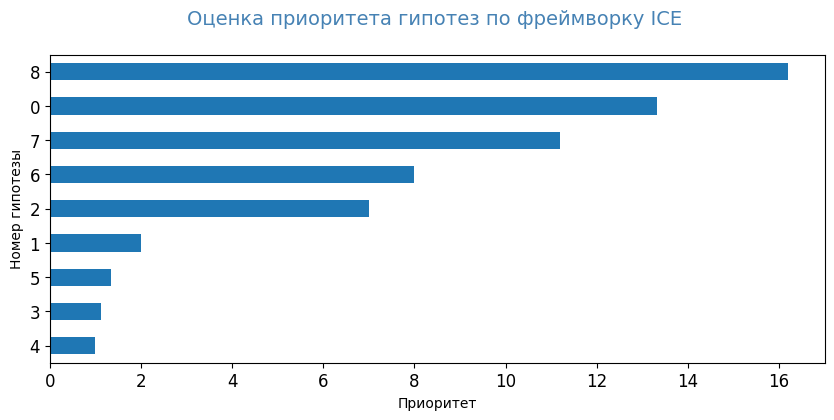

In [19]:
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis = hypothesis.sort_values(by='ICE')
hypothesis.ICE.plot(kind = 'barh', 
                    figsize = (10, 4), 
                    rot = 0, 
                    ylabel='Номер гипотезы', 
                    xlabel='Приоритет', 
                    legend = False, 
                    fontsize = 12)\
.set_title('Оценка приоритета гипотез по фреймворку ICE \n', fontsize = 14, color = 'SteelBlue') ;

### Фреймворк RICE

Применим фреймворк `RICE` для приоритизации гипотез

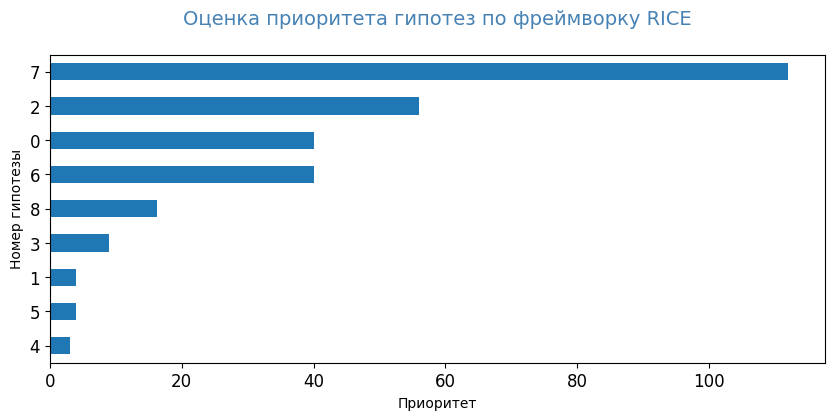

In [20]:
hypothesis['RICE'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis = hypothesis.sort_values(by='RICE')
hypothesis.RICE.plot(kind = 'barh', 
                    figsize = (10, 4), 
                    rot = 0, 
                    ylabel='Номер гипотезы', 
                    xlabel='Приоритет', 
                    legend = False, 
                    fontsize = 12)\
.set_title('Оценка приоритета гипотез по фреймворку RICE' + "\n", fontsize = 14, color = 'SteelBlue') ;

- Наименее приоритетные гипотезы по оценке обоих фреймворков сохранились: это гипотезы 1, 3, 4 и 5
- В тройку лидеров по обеим оценкам входят гипотезы 0 и 7
- При этом по оценке `RICE` гипотеза 2 значительно увеличила свой приоритет в сравнении с оценкой `ICE`: с пятого места она переместилась на второе
- Гипотеза 7 по оценке `ICE` занимала третье место, а по оценке `RICE` поднялась на первое
- Гипотеза 8 по оценке `ICE` занимала первое место, а по оценке `RICE` опустилась на пятое
- Разница в рейтингах объясняется показателем `reach`: фреймворк `RICE` его учитывает, а фреймворк `ICE` не принимает во внимание
- Значительные различия в рейтингах у тех гипотез, которым соответствуют экстремальные значения параметра `reach` -- очень большие или очень маленькие, при этом среднее значения параметра у гипотезы 6 (5 баллов) не привело к изменению положения в рейтинге: по обеим оценкам гипотеза на четвертом месте

In [21]:
hypothesis.sort_values(by='RICE', ascending=False).reset_index(drop=True)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
2,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
3,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
4,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
7,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


### **Вывод**

- В данном случае рекомендуется руководствоваться оценкой `RICE`, поскольку параметр `reach` уже оценен для всех гипотез и позволит повысить уверенность оценки при принятии решения
- По оценке `RICE` наибольшим приоритетом обладают гипотезы 7, 2 и 6

## Анализ А/В-теста

### Динамика кумулятивных показателей

Агрегируем исходные данные

In [22]:
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max', 
      'transaction_id' :'nunique', 
      'visitor_id' : 'nunique', 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max', 
      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     17      17      59758    713     
2 2019-08-02  A     42      36      234381   1338    
3 2019-08-02  B     40      39      221801   1294    
4 2019-08-03  A     66      60      346854   1845    


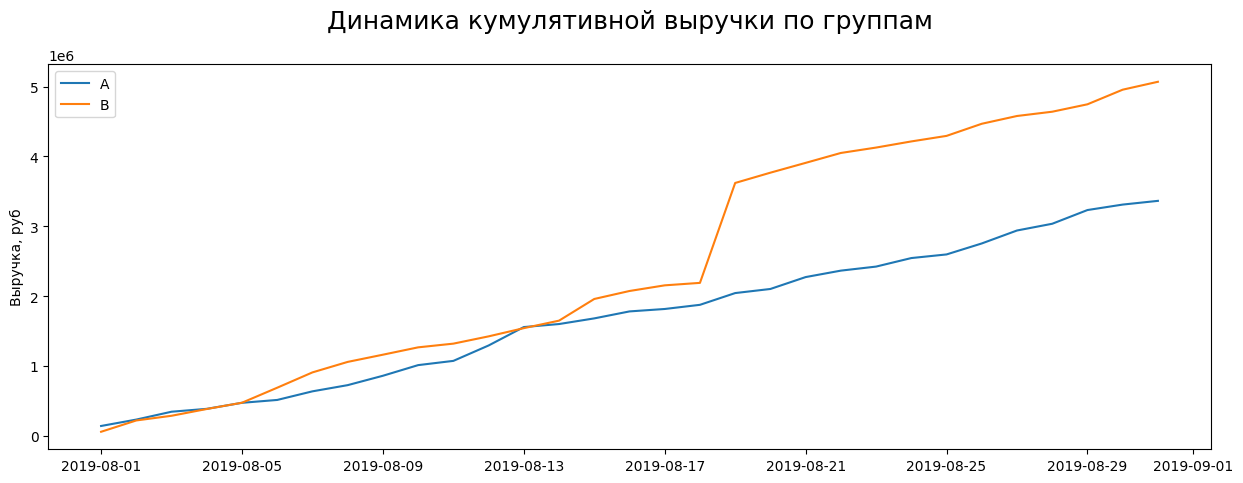

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Динамика кумулятивной выручки по группам' + "\n", fontsize = 18)
plt.ylabel('Выручка, руб')

plt.legend();

- Накопленная выручка по группе А равномерно растет на протяжении всего теста и находится стабильно ниже почти с самого старта
- Накопленная выручка по группе В демонстрирует резкий рост 18 августа, возможно, это связано с аномальной большой покупкой / покупками в этот период

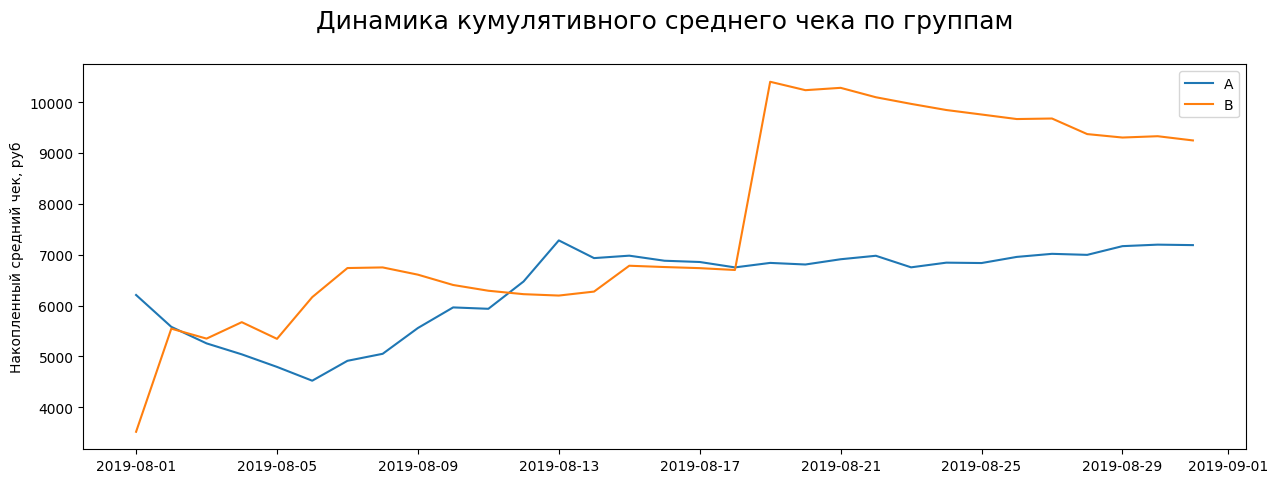

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Динамика кумулятивного среднего чека по группам' + "\n", fontsize = 18)
plt.ylabel('Накопленный средний чек, руб')

plt.legend();

- По группе А виден провал в начале августа с дальнейшей стабилизацией во второй половине тестирования
- Группа В демонстрирует больший накопленный средний чек во все периоды, кроме первых дней и середины августа
- В ту же дату, что и по накопленной выручке, замечен серьезный выброс по группе В, после которого накопленное значение среднего чека начинает падать, что косвенно говорит о том, что это влияние малого количества аномально больших заказов

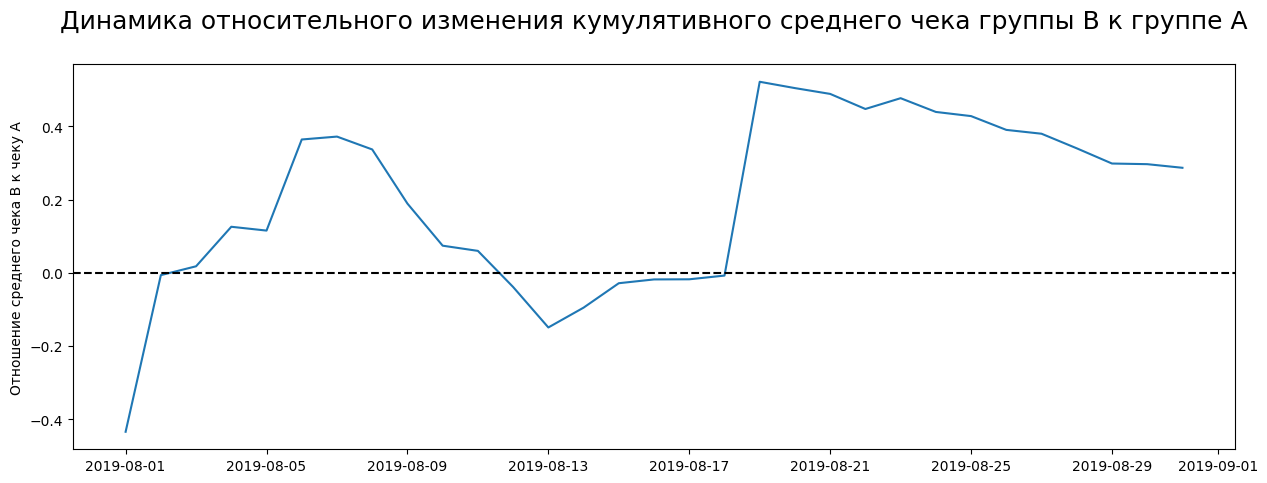

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.title('Динамика относительного изменения кумулятивного среднего чека группы B к группе A' + "\n", fontsize = 18)
plt.ylabel('Отношение среднего чека В к чеку А')

plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--');

- График относительного изменения накопленного среднего чека дополнительно подсвечивает заметные на предыдущем графике отличия по группам
- В первые два дня теста и в середине августа группа В отстает, в остальные периоды значительно опережает группу А
- Скачкообразный рост 18 августа, вероятно, связан с аномально крупными заказами

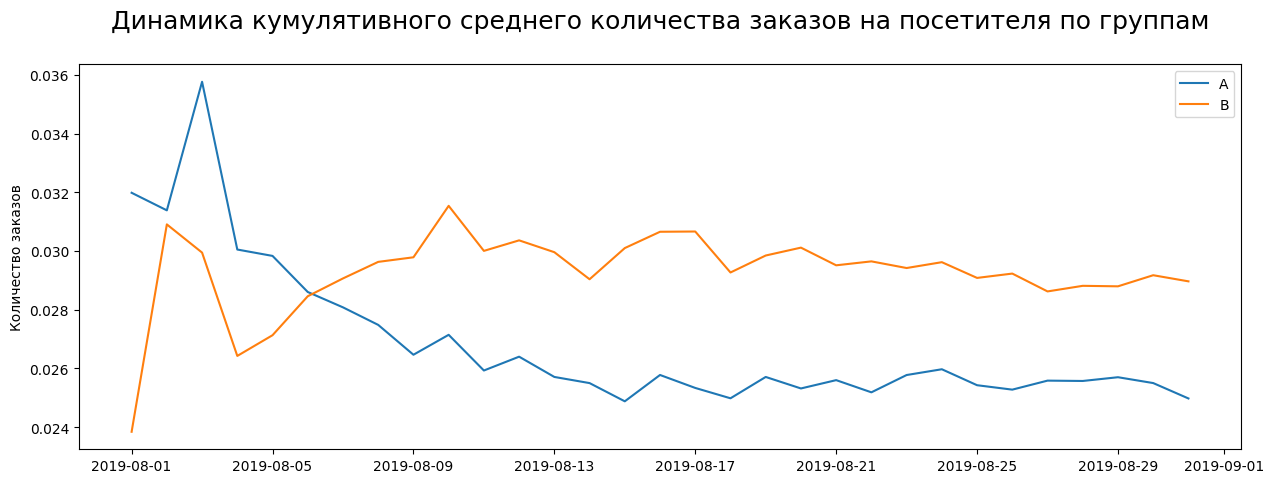

In [26]:
cumulative_orders_A = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulative_orders_B = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

plt.figure(figsize=(15, 5))
plt.plot(cumulative_orders_A['date'], cumulative_orders_A['orders']/cumulative_orders_A['visitors'], label='A')
plt.plot(cumulative_orders_A['date'], cumulative_orders_B['orders']/cumulative_orders_B['visitors'], label='B')
plt.title('Динамика кумулятивного среднего количества заказов на посетителя по группам' + "\n", fontsize = 18)
plt.ylabel('Количество заказов')

plt.legend();

- До 6 августа накопленное среднее количество заказов на посетителя по группе А было выше
- Далее ситуация изменилась на противоположную: в группе В все время заказывают больше
- Графики колеблятся до 26 августа, после этой даты они условно стабилизируются; сохраняется большее количество заказов на посетителя для группы В

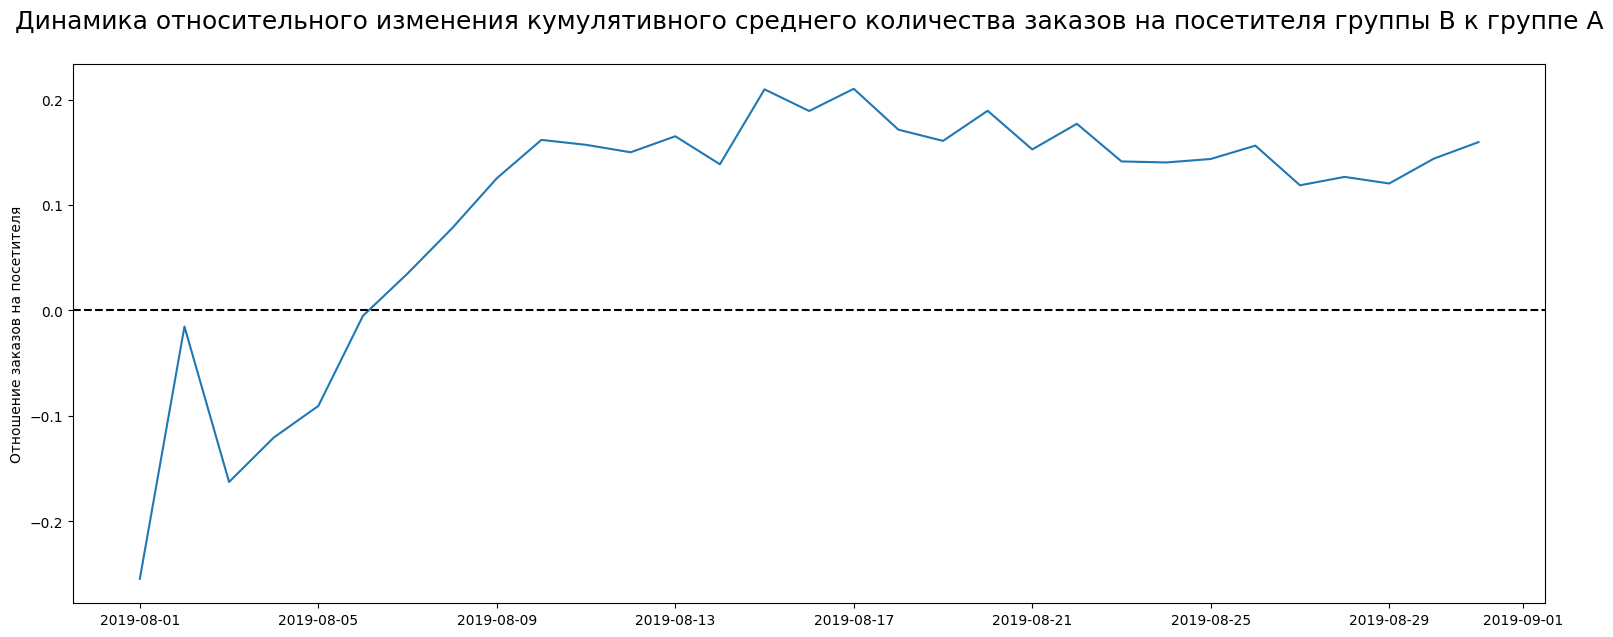

In [27]:
merged_cumulative_orders = cumulative_orders_A.merge(cumulative_orders_B, 
                                                     left_on='date', 
                                                     right_on='date', 
                                                     how='left', 
                                                     suffixes=['A', 'B'])

plt.figure(figsize=(19, 7))
plt.title('Динамика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A' + "\n", 
          fontsize = 18)
plt.ylabel('Отношение заказов на посетителя')

plt.plot(merged_cumulative_orders['date'], 
         (merged_cumulative_orders['ordersB']/merged_cumulative_orders['visitorsB'])/
         (merged_cumulative_orders['ordersA']/merged_cumulative_orders['visitorsA'])-1)

plt.axhline(y=0, color='black', linestyle='--');

- Вновь количество заказов на посетителя группы В почти с начала превышает этот же показатель для группы А
- В конце теста отношение показателей стабилизируется примерно на уровне 0.125

### Распределение показателей

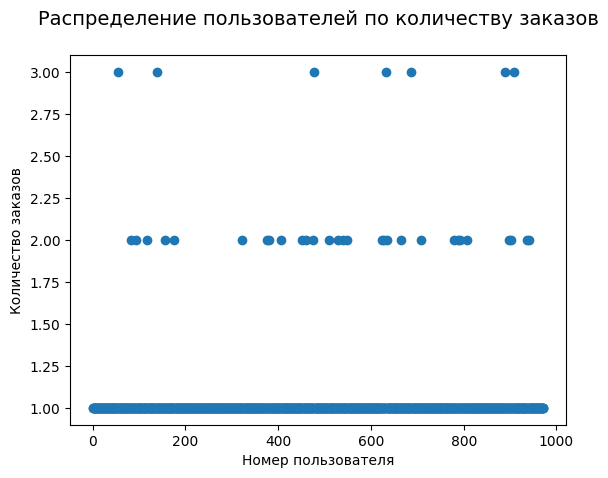

In [28]:
orders_x_visitors = (
    orders.groupby('visitor_id')
    .agg({'transaction_id': 'nunique'})
    .reset_index()
)

orders_x_visitors.columns = ['visitor_id', 'orders_cnt']



plt.title('Распределение пользователей по количеству заказов' + "\n", fontsize = 14)
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')

plt.scatter(pd.Series(range(0, len(orders_x_visitors))), orders_x_visitors.orders_cnt);

- Абсолютное большинство пользователей не делают больше одного заказа
- Больше двух заказов у пользователя -- большая редкость

In [29]:
np.percentile(orders_x_visitors.orders_cnt, [95, 99])

array([1., 2.])

In [30]:
percentile = pd.DataFrame([[95, 0], [99, 0]])
percentile.columns = ['Перцентиль', 'Количество заказов']
percentile['Количество заказов'] = np.percentile(orders_x_visitors.orders_cnt, [95, 99])
percentile

,Перцентиль,Количество заказов
0,95,1.00
1,99,2.00


Выберем границей для аномальных пользователей два заказа и более -- таким образом отсечем 1 % пользователей с наибольшим количеством заказов 

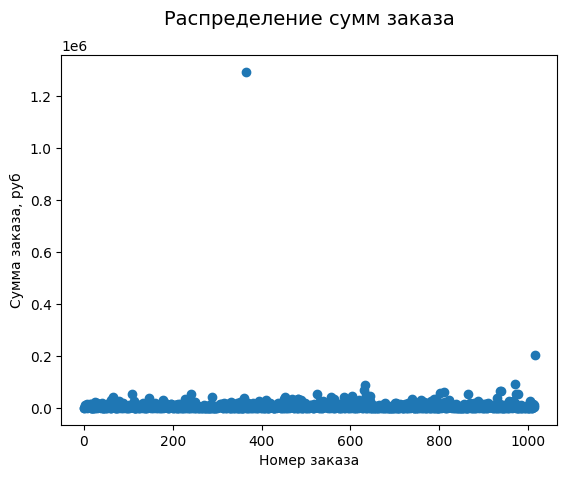

In [31]:
plt.title('Распределение сумм заказа' + "\n", fontsize = 14)
plt.xlabel('Номер заказа')
plt.ylabel('Сумма заказа, руб')

plt.scatter(pd.Series(range(0, len(orders))), orders.revenue);

- Абсолютное большинство заказов не превышает 50 тыс. руб
- Есть два экстремальных выброса: 200 тыс. и свыше 1.2 млн

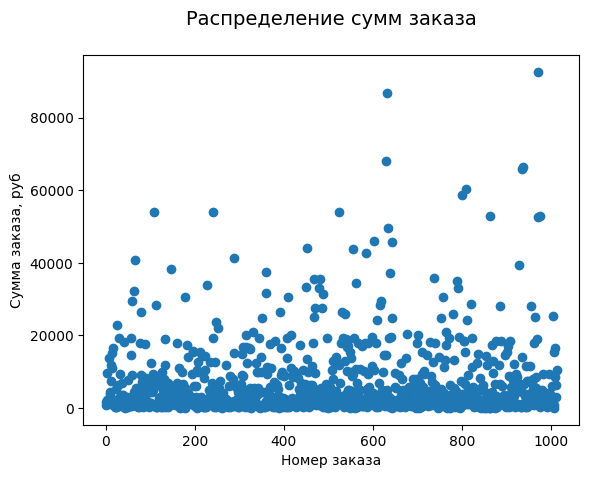

In [32]:
plt.title('Распределение сумм заказа' + "\n", fontsize = 14)
plt.xlabel('Номер заказа')
plt.ylabel('Сумма заказа, руб')

cut_value = 200_000

plt.scatter(pd.Series(range(0, len(orders.query('revenue < @cut_value')))), orders.query('revenue < @cut_value').revenue);

Удаление выбросов позволяет заметить, что абсолютное большинство заказов не превышает даже 20 тыс.

In [33]:
percentile.columns = ['Перцентиль', 'Сумма заказа, руб']
percentile['Сумма заказа, руб'] = np.percentile(orders.revenue, [95, 99])
percentile

,Перцентиль,"Сумма заказа, руб"
0,95,"26,785.00"
1,99,"53,904.00"


Выберем границей для аномальных сумм заказа 95-ый перцентиль: 26 785 руб -- таким образом отсечем 5 % заказов с наибольшей суммой

### Оценка статистической значимости различий

- В данных немало выбросов: для сравнения средних значений применим U-test
- Подготовим данные для U-теста: заполним два файла типа `series` по группам, где для каждого посетителя отобразим количество покупок (также добавим количество строк по разнице между накопленным количеством визитов и покупающих пользователей и проставим нули)

In [34]:
sample_A = (orders
            .query('group == "A" ')
            .groupby('visitor_id')['transaction_id']
            .count()
            .reset_index(drop=True))

sample_B = (orders
            .query('group == "B" ')
            .groupby('visitor_id')['transaction_id']
            .count()
            .reset_index(drop=True))


visitors_A_cum = visitors.query('group == "A" ')['visitors'].sum()
visitors_B_cum = visitors.query('group == "B" ')['visitors'].sum()


sample_A = pd.concat([sample_A, pd.Series(0,
                                          index=np.arange(visitors_A_cum - len(sample_A)))])

sample_B = pd.concat([sample_B, pd.Series(0,
                                          index=np.arange(visitors_B_cum - len(sample_B)))])


print(sample_A.tail())
print(sample_B.tail())

18286    0
18287    0
18288    0
18289    0
18290    0
dtype: int64
18383    0
18384    0
18385    0
18386    0
18387    0
dtype: int64


Напишем функцию для применения U-теста:

In [35]:
def sample_comparison(group_A, group_B, alpha=0.05): # U-test for mean
    
    p_val = st.mannwhitneyu(group_A, group_B)[1]
    
    print(f'Отклонение среднего группы В относительно группы А: {group_B.mean() / group_A.mean() - 1 :.1%}')
    print(f'p-value: {p_val:.2%}, alpha: {alpha:.2%}')
    print()
    if p_val < alpha:
        print('+ отвергаем нулевую гипотезу в пользу альтернативной')
    else: print('- не удалось отвергнуть нулевую гипотезу')

#### Количество заказов, исходные данные

**H<sub>0</sub>:** Среднее число заказов групп А и В одинаково по исходным данным

**H<sub>1</sub>:** Среднее число заказов групп А и В отличается по исходным данным

In [36]:
sample_comparison(sample_A, sample_B)

Отклонение среднего группы В относительно группы А: 16.0%
p-value: 1.10%, alpha: 5.00%

+ отвергаем нулевую гипотезу в пользу альтернативной


- Вероятность получить такое же или большее различие между метриками случайно составила 1.1 %, это значительно меньше принятого уровня статистической значимости -- **отвергаем нулевую гипотезу в пользу альтернативной**

- Для исходных данных существует статистически значимая разница количества заказов между группами: в группе В в среднем заказывают на 16 % больше

#### Средний чек, исходные данные

**H<sub>0</sub>:** Средний чек групп А и В одинаковый по исходным данным

**H<sub>1</sub>:** Средний чек групп А и В различный по исходным данным

In [37]:
sample_comparison(orders.query('group == "A" ')['revenue'], 
                  orders.query('group == "B" ')['revenue'])

Отклонение среднего группы В относительно группы А: 28.7%
p-value: 82.95%, alpha: 5.00%

- не удалось отвергнуть нулевую гипотезу


- Вероятность получить такое же или большее различие между метриками случайно составила 82.95 %, это значительно больше принятого уровня статистической значимости -- **не удалось отвергнуть нулевую гипотезу**

- Статистически значимого различия в среднем чеке между группами для исходных данных не обнаружено

- Теперь проведем те же расчеты, но отфильтруем аномально высокие значения количества заказов на пользователя и суммы заказа
- Ранее выбрали границу аномалий для количества и суммы заказа: больше одного заказа и больше 26 785 рублей (95-ый перцентиль)
- Найдем пользователей, удовлетворяющих условию этому условию:

In [38]:
orders_cnt_threshold = 1
order_revenue_threshold = 26_785

orders_vs_users_A = (orders
                    .query('group == "A" ')
                    .groupby('visitor_id')['transaction_id']
                    .count()
                    .reset_index()
                    .rename(columns={'transaction_id':'orders'}))

orders_vs_users_B = (orders
                    .query('group == "B" ')
                    .groupby('visitor_id')['transaction_id']
                    .count()
                    .reset_index()
                    .rename(columns={'transaction_id':'orders'}))


users_with_many_orders = pd.concat(
    [
        orders_vs_users_A.query('orders > @orders_cnt_threshold')['visitor_id'],
        orders_vs_users_B.query('orders > @orders_cnt_threshold')['visitor_id']
    ]
)

users_with_expensive_orders = orders.query('revenue > @order_revenue_threshold')['visitor_id']

abnormal_users = (pd.concat(
    [
        users_with_many_orders, 
        users_with_expensive_orders
    ]
)
    .drop_duplicates()
    .sort_values()
                 )

print(abnormal_users.shape[0])
abnormal_users.head()

86


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64

Итого 86 аномальных пользователей, которых отфильтруем далее при проверке

#### Количество заказов, отфильтрованные данные

Используем список аномальных пользователей для фильтрации:

In [39]:
sample_A_filtered = (orders[~orders['visitor_id'].isin(abnormal_users)]
                    .query('group == "A" ')
                    .groupby('visitor_id')['transaction_id']
                    .count()
                    .reset_index(drop=True))

sample_B_filtered = (orders[~orders['visitor_id'].isin(abnormal_users)]
                    .query('group == "B" ')
                    .groupby('visitor_id')['transaction_id']
                    .count()
                    .reset_index(drop=True))

sample_A_filtered = pd.concat([sample_A_filtered, pd.Series(0,
                                          index=np.arange(visitors_A_cum - len(sample_A_filtered)))])

sample_B_filtered = pd.concat([sample_B_filtered, pd.Series(0,
                                          index=np.arange(visitors_B_cum - len(sample_B_filtered)))])

**H<sub>0</sub>:** Среднее число заказов групп А и В одинаково по фильтрованным данным

**H<sub>1</sub>:** Среднее число заказов групп А и В отличается по фильтрованным данным

In [40]:
sample_comparison(sample_A_filtered, sample_B_filtered)

Отклонение среднего группы В относительно группы А: 17.3%
p-value: 1.62%, alpha: 5.00%

+ отвергаем нулевую гипотезу в пользу альтернативной


- Вероятность получить такое же или большее различие между метриками случайно составила 1.62 %, это значительно меньше принятого уровня статистической значимости и меньше вероятности для исходных данных -- **отвергаем нулевую гипотезу в пользу альтернативной**

- Для исходных данных `p-value` составило 1.1 %, а отклонение в среднем количестве заказов 16.0 %
- Фильтрация аномальных значений немного увеличила отклонение между группами, но также немного снизила статистическую значимость этого отклонения -- `p-value` выросло после удаления аномалий на 0.5 %

#### Средний чек, отфильтрованные данные

Теперь рассчитаем статистическую значимость различий в среднем чеке заказа между группами для отфильтрованных данных

In [41]:
sample_A_filtered = (orders[~orders['visitor_id'].isin(abnormal_users)]
                    .query('group == "A" ')
                    .revenue)

sample_B_filtered = (orders[~orders['visitor_id'].isin(abnormal_users)]
                    .query('group == "B" ')
                    .revenue)

**H<sub>0</sub>:** Средний чек групп А и В одинаковый по фильтрованным данным

**H<sub>1</sub>:** Средний чек групп А и В различный по фильтрованным данным

In [42]:
sample_comparison(sample_A_filtered, sample_B_filtered)

Отклонение среднего группы В относительно группы А: -3.4%
p-value: 72.71%, alpha: 5.00%

- не удалось отвергнуть нулевую гипотезу


- Вероятность получить такое же или большее различие между метриками случайно составила 72.71 %, это значительно больше принятого уровня статистической значимости -- **не удалось отвергнуть нулевую гипотезу**
- Статистически значимого различия в среднем чеке между группами для отфильтрованных данных не обнаружено
- Фильтрация данных привела к противоположному соотношению между средними чеками групп: после удаления аномалий, средний чек группы В меньше группы А, при этом несколько увеличилась статистическая значимость этого результата, но она все же далеко за принятой границей уровня значимости

### **Вывод**

- Нет статистически значимого различия по среднему чеку между группами, как в исходных данных, так и в фильтрованных
- Есть статистически значимое различие по среднему количеству заказов, как в исходных данных, так и в фильтрованных; фильтрация данных от пользователей с аномально высоким количеством заказов снижает оценку случайного получения такого различия
- Рекомендуется остановить тест, группа В демонстрирует лучшие показатели в сравнении с группой А

## **Общий вывод**


**Предобработка данных**

- Исправлено форматирование названий  столбцов
- Столбцы с датой приведены к типу `datetime`
- Пропусков и дубликатов данных не обнаружено
- У 58 пользователей замечено изменение группы в ходе тестирования, всем пользователям присвоены группы, к которым они были отнесены первоначально

**Приоритизация гипотез**

- Проведена приоритизация девяти гипотез с помощью фреймворков `ICE` и `RICE`
- В нашем случае рекомендуется руководствоваться оценкой `RICE`, поскольку параметр `reach` уже оценен для всех гипотез и позволит повысить уверенность оценки при принятии решения
- По оценке `RICE` наибольшим приоритетом обладают гипотезы 7, 2 и 6


**Анализ А/В-теста**

- Нет статистически значимого различия по среднему чеку между группами, как в исходных данных, так и в фильтрованных
- Есть статистически значимое различие по среднему количеству заказов, как в исходных данных, так и в фильтрованных; фильтрация данных от пользователей с аномально высоким количеством заказов незначительно увеличила оценку вероятности случайного получения такого различия
- Рекомендуется остановить тест, группа В демонстрирует лучшие показатели в сравнении с группой А